# Can you make accurate predictions about future volatility from patterns in historical volatility? #
 This notebook aims to answer that question by comparing AI models to an established model of the volatility of the market known as the CBOE Volatility Index.

In [ ]:
%%capture
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import math
from datetime import date
from matplotlib import pyplot as plt

**Data Collection**

In [ ]:
# List of stocks to investigate

tickers = ["LMT", "RTX", "BA", "NOC", "GD", "DRS", "AAPL", "T", "GOOG", "MSFT",
           "META", "CSCO", "ADM", "PEP", "TSN", "MDLZ", "KO", "GIS", "UNH",
           "CI", "CVS", "CAH", "ABC", "MCK", "WMT", "COST", "HD", "TGT", 
           "AMZN", "BBY", "BRK-B", "JPM", "BAC", "WFC", "C", "BLK"]

# All S&P 500 Stocks. Don't use until you're sure the code works.
tickers_2 = ['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'BRK-B', 'XOM', 'UNH',
             'JNJ', 'V', 'NVDA', 'JPM', 'WMT', 'TSLA', 'META', 'MA', 'PG', 
             'CVX', 'LLY', 'HD', 'MRK', 'BAC', 'ABBV', 'PFE', 'KO', 'AVGO',
             'PEP', 'ORCL', 'TMO', 'COST', 'CSCO', 'NKE', 'DHR', 'MCD', 'ABT',
             'ACN', 'TMUS', 'DIS', 'VZ', 'NEE', 'CMCSA', 'WFC', 'LIN', 'TXN', 
             'ADBE', 'UPS', 'PM', 'MS', 'BMY', 'SCHW', 'COP', 'CRM', 'RTX', 
             'NFLX', 'HON', 'AMGN', 'T', 'QCOM', 'CAT', 'UNP', 'IBM', 'LOW', 
             'DE', 'BA', 'GS', 'INTC', 'SPGI', 'SBUX', 'LMT', 'CVS', 'AXP', 
             'ELV', 'AMD', 'BLK', 'PLD', 'INTU', 'AMT', 'GILD', 'MDT', 'ADP',
             'SYK', 'C', 'CI', 'TJX', 'CB', 'EL', 'AMAT', 'MDLZ', 'PYPL', 
             'ISRG', 'BKNG', 'MMC', 'GE', 'ADI', 'NOW', 'SLB', 'MO', 'DUK', 
             'PGR', 'EOG', 'SO', 'REGN', 'VRTX', 'NOC', 'ZTS', 'TGT', 'BDX', 
             'MRNA', 'HCA', 'MMM', 'ITW', 'USB', 'APD', 'CSX', 'PNC', 'GD', 
             'EQIX', 'BSX', 'ETN', 'CCI', 'AON', 'FISV', 'FCX', 'CL', 'LRCX', 
             'CME', 'SHW', 'WM', 'TFC', 'HUM', 'MU', 'ICE', 'ATVI', 'CHTR', 
             'OXY', 'KLAC', 'NSC', 'EMR', 'PXD', 'MCO', 'MPC', 'MET', 'GM', 
             'MCK', 'F', 'D', 'MNST', 'VLO', 'PSA', 'DG', 'KHC', 'SNPS', 'ORLY',
             'MAR', 'SRE', 'KDP', 'AEP', 'GIS', 'PSX', 'FDX', 'APH', 'EW', 
             'ADM', 'ROP', 'AIG', 'JCI', 'HES', 'A', 'CDNS', 'KMB', 'HSY', 
             'CTAS', 'TRV', 'CTVA', 'AFL', 'AZO', 'CNC', 'MSI', 'NXPI', 'ECL', 
             'PAYX', 'ADSK', 'EXC', 'KMI', 'NEM', 'CMG', 'DVN', 'O', 'TT', 
             'BIIB', 'DXCM', 'MCHP', 'SPG', 'DOW', 'STZ', 'AJG', 'FIS', 'ROST', 
             'LVS', 'IQV', 'SYY', 'PH', 'MSCI', 'WMB', 'NUE', 'TEL', 'XEL', 
             'RSG', 'BK', 'IDXX', 'COF', 'HAL', 'LHX', 'CARR', 'FTNT', 'DD', 
             'PRU', 'TDG', 'HLT', 'ALL', 'YUM', 'ANET', 'CMI', 'PCAR', 'AMP', 
             'EA', 'ED', 'ODFL', 'OTIS', 'MTD', 'WELL', 'ABC', 'CTSH', 'AME', 
             'SBAC', 'DHI', 'ENPH', 'DLTR', 'VICI', 'KR', 'CSGP', 'ROK', 'WBD',
             'KEYS', 'PCG', 'OKE', 'WBA', 'BKR', 'BF-B', 'RMD', 'PEG', 'NDAQ', 
             'PPG', 'GLW', 'DLR', 'WEC', 'LYB', 'ILMN', 'STT', 'ES', 'IFF', 
             'GPN', 'AWK', 'DFS', 'GWW', 'VRSK', 'ALB', 'LEN', 'ON', 'FAST', 
             'HPQ', 'WTW', 'APTV', 'CEG', 'URI', 'CBRE', 'TROW', 'IT', 'EFX', 
             'CDW', 'EIX', 'ZBH', 'MTB', 'ARE', 'FANG', 'HRL', 'DAL', 'EBAY', 
             'ULTA', 'FE', 'RJF', 'TSCO', 'HIG', 'VMC', 'FITB', 'K', 'GPC', 
             'AVB', 'FTV', 'WY', 'ACGL', 'TSN', 'EQR', 'IR', 'AEE', 'DTE', 
             'FRC', 'BAX', 'PPL', 'VRSN', 'LH', 'LUV', 'ANSS', 'MLM', 'ETR', 
             'MKC', 'PFG', 'HBAN', 'PWR', 'XYL', 'HPE', 'RF', 'EXR', 'CFG', 
             'NTRS', 'CAH', 'DOV', 'CTRA', 'STE', 'WAT', 'VTR', 'CHD', 'HOLX', 
             'EPAM', 'CNP', 'TDY', 'WRB', 'STLD', 'INVH', 'CAG', 'BBY', 'FSLR', 
             'WAB', 'GRMN', 'MPWR', 'CMS', 'JBHT', 'MAA', 'AES', 'ROL', 'ALGN', 
             'WST', 'PAYC', 'AMCR', 'DRI', 'BALL', 'INCY', 'IEX', 'CLX', 'EXPD',
             'TTWO', 'MOH', 'BRO', 'MRO', 'SEDG', 'COO', 'OMC', 'KEY', 'TRGP', 
             'BR', 'FOX', 'FOXA', 'CINF', 'CF', 'LYV', 'DGX', 'HWM', 'UAL', 
             'PKI', 'SJM', 'ETSY', 'ATO', 'CPB', 'FMC', 'SWKS', 'J', 'MOS', 
             'RCL', 'FDS', 'NVR', 'AVY', 'EXPE', 'LKQ', 'PTC', 'IRM', 'SYF', 
             'ZBRA', 'SIVB', 'TER', 'MGM', 'BEN', 'TXT', 'CPRT', 'PEAK', 'EVRG',
             'APA', 'FLT', 'GEN', 'ESS', 'L', 'VTRS', 'LNT', 'LW', 'IPG', 'KIM',
             'AKAM', 'NDSN', 'NTAP', 'RE', 'POOL', 'LDOS', 'IP', 'TRMB', 'PARA',
             'JKHY', 'BIO', 'SNA', 'CE', 'TYL', 'UDR', 'CBOE', 'MTCH', 'EQT', 
             'SWK', 'CPT', 'PKG', 'HST', 'MKTX', 'STX', 'WDC', 'DPZ', 'VFC', 
             'CRL', 'GL', 'MAS', 'PHM', 'CCL', 'REG', 'NI', 'NWS', 'NWSA', 
             'TFX', 'WYNN', 'BXP', 'CHRW', 'EMN', 'AAL', 'HSIC', 'UHS', 'KMX',
             'BBWI', 'BWA', 'TPR', 'JNPR', 'CDAY', 'CZR', 'QRVO', 'ALLE', 'WRK',
             'AOS', 'AAP', 'HII', 'HAS', 'CMA', 'IVZ', 'FRT', 'FFIV', 'CTLT', 
             'PNW', 'WHR', 'RHI', 'PNR', 'RL', 'DISH', 'OGN', 'SEE', 'XRAY', 
             'ZION', 'MHK', 'NRG', 'GNRC', 'SBNY', 'DVA', 'AIZ', 'DXC', 'NCLH', 
             'ALK', 'NWL', 'LUMN', 'LNC', 'TECH', 'TAP', 'GEHC']

In [ ]:
# Function that fetches historical volatility as an array

def historical_volatility(ticker, timeString):
    ticker = yf.Ticker(ticker)
    history = ticker.history(timeString)
    history = history[["Close"]]
    months = []
    for i in range(int(np.floor(len(history)/21))):
        months += [[i[0] for i in (history.values.tolist())[i*21:(i+1)*21]]]

    for i in range(len(months)):
        for j in range(len(months[i]) - 1):
            months[i][j] = math.log(months[i][j + 1]/months[i][j]) * (252**0.5)
        months[i].pop()

    months = [np.std(month) for month in months]
    
    return months

In [ ]:
print(historical_volatility("AAPL", "5Y"))

[0.3481156322396619, 0.24479327903683146, 0.2503722221962719, 0.2252570666989281, 0.12697242767034578, 0.13681634954521685, 0.2462179601527052, 0.2163946461765324, 0.29636807845398605, 0.4409422867912902, 0.36371156366740476, 0.4512803808640871, 0.2686078591749891, 0.22581646990202545, 0.11997483950008787, 0.34454070825376576, 0.22210846745524168, 0.16843747303482925, 0.3808120992610219, 0.19766305917244686, 0.20128926262749355, 0.17574036142650593, 0.1667455244065446, 0.20031117298342413, 0.3416641789529347, 1.0450167110979356, 0.4672302072934838, 0.2163924363900451, 0.29158420068769886, 0.2623270407296906, 0.4242648723156113, 0.5356789202412546, 0.3555985379445189, 0.40101419731848165, 0.25519859289157665, 0.3363265266513027, 0.2608342425731374, 0.37674799942786813, 0.2136250494459738, 0.2457322299164526, 0.15415366547490258, 0.21644911259905217, 0.15045610820930375, 0.22235564932782623, 0.18306909604168822, 0.18975705842932392, 0.33394371005130075, 0.19649593114311045, 0.34251359683

In [ ]:
inputsArray = []

for ticker in tickers_2:
  inputsArray += [historical_volatility(ticker, "5Y")]

In [ ]:
months_to_predict = 12 # How many months in the future both the model and our measurements will try to predict.
size_of_input = 12

x = []
y = []

for i in range(len(inputsArray)):
  if(len(inputsArray[i]) > 47):
    if(i%5 != 0):
      randomNum = (i%24 + 1)
      y += [inputsArray[i][randomNum: randomNum + months_to_predict]]
      x += [inputsArray[i][randomNum + months_to_predict: randomNum + months_to_predict + size_of_input]]
    else:
      y += [inputsArray[i][:months_to_predict]]
      x += [inputsArray[i][months_to_predict: months_to_predict + size_of_input]]

null_prediction = []
for i in x:
  month_data = []
  for j in range(months_to_predict):
    month_data += [i[0]]
  null_prediction += [month_data]

x.reverse()
y.reverse()


x_train = []
y_train = []
x_test = []
y_test = []

null_test = []

for i in range(len(x)):
  if i%5 == 0:
    y_test += [y[i]]
    x_test += [x[i]]
    null_test += [null_prediction[i]]
  else:
    y_train += [y[i]]
    x_train += [x[i]]


print(x[0])
print(y[0])
print(null_prediction[0])
print(len(x), len(y), len(x_train), len(x_test), len(null_test), len(x[0]))

[0.23803434419131508, 0.2913779528315302, 0.4496261731714699, 0.2581849990864486, 0.2807007828248014, 0.381299664764275, 0.25885120888982516, 0.18983022839505306, 0.24379973526265808, 0.21462444363138777, 0.20229508373802071, 0.27422089696354646]
[0.19688397794509202, 0.11500108090856599, 0.2799147853429554, 0.8793655659387677, 0.5564245579971562, 0.6263117289397936, 0.5238161404794415, 0.34901840591794836, 0.20920952273706026, 0.26360599405602364, 0.27612252420421923, 0.49860431292767105]
[0.26860882335898334, 0.26860882335898334, 0.26860882335898334, 0.26860882335898334, 0.26860882335898334, 0.26860882335898334, 0.26860882335898334, 0.26860882335898334, 0.26860882335898334, 0.26860882335898334, 0.26860882335898334, 0.26860882335898334]
494 494 395 99 99 12


**Model Creation**

In [ ]:
from tensorflow import keras
from keras.layers import LSTM, Dropout, Dense

model = keras.models.Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(12,1), activation='tanh'),
    Dropout(0.2),
    LSTM(units=100, return_sequences=False, activation='tanh'),
    Dense(12, activation='swish')]
)


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 100)           40800     
                                                                 
 dropout_2 (Dropout)         (None, 12, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 12)                1212      
                                                                 
Total params: 122,412
Trainable params: 122,412
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='SGD', metrics='mean_absolute_percentage_error')

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=50, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
8/8 [==============================] - 4s 122ms/step - loss: 0.1559 - mean_absolute_percentage_error: 97.3235 - val_loss: 0.1244 - val_mean_absolute_percentage_error: 96.1494
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1533 - mean_absolute_percentage_error: 95.4832 - val_loss: 0.1220 - val_mean_absolute_percentage_error: 94.2528
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1508 - mean_absolute_percentage_error: 93.6085 - val_loss: 0.1196 - val_mean_absolute_percentage_error: 92.3427
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1483 - mean_absolute_percentage_error: 91.7633 - val_loss: 0.1172 - val_mean_absolute_percentage_error: 90.4263
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1458 - mean_absolute_percentage_error: 89.8429 - val_loss: 0.1149 - val_mean_absolute_percentage_error: 88.5036
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - los

In [ ]:
model.predict(np.array([x_test[0]]))

1/1 [==============================] - 1s 647ms/step


array([[0.256435  , 0.25274804, 0.29540592, 0.27944687, 0.26679528,
        0.28719786, 0.2993717 , 0.2965721 , 0.2922628 , 0.3518889 ,
        0.36059237, 0.3165911 ]], dtype=float32)

In [ ]:
y_test[0]

[0.19688397794509202,
 0.11500108090856599,
 0.2799147853429554,
 0.8793655659387677,
 0.5564245579971562,
 0.6263117289397936,
 0.5238161404794415,
 0.34901840591794836,
 0.20920952273706026,
 0.26360599405602364,
 0.27612252420421923,
 0.49860431292767105]

**Processing Results**

In [ ]:
def compare_ai_to_models(null, ai, test_data):
  null_results = []
  ai_results = []
  for i in range(len(test_data)):
    comparison_data = test_data[i]
    null_temp = []
    ai_temp = []
    for j in range(len(comparison_data)):
      null_temp += [abs(null[i][j] - comparison_data[j])/comparison_data[j]]
      ai_temp += [abs(ai[i][j] - comparison_data[j])/comparison_data[j]]
    null_results += [null_temp]
    ai_results += [ai_temp]
  
  null_results = np.array(null_results).mean(axis=0)
  ai_results = np.array(ai_results).mean(axis=0)

  null_results = np.append(null_results, null_results.mean())
  ai_results = np.append(ai_results, ai_results.mean())

  dataframe = pd.DataFrame.from_dict(data = {"": ["Month 1", "Month 2", "Month 3", "Month 4", "Month 5", "Month 6", "Month 7", "Month 8", "Month 9", "Month 10", "Month 11", "Month 12", "Average"], 
               "Null Percent Error": null_results, 
               "AI Percent Error": ai_results})
  return dataframe

In [ ]:
ai_test = []
for i in x_test:
  ai_test += model.predict(np.array([i])).tolist()

print(compare_ai_to_models(null_test, ai_test, y_test))

1/1 [==============================] - 0s 16ms/step
              Null Percent Error  AI Percent Error
0    Month 1            0.900386          0.404981
1    Month 2            0.733761          0.336205
2    Month 3            0.776665          0.517976
3    Month 4            0.745656          0.502168
4    Month 5            0.790531          0.492419
5    Month 6            0.775289          0.556077
6    Month 7            0.822555          0.576250
7    Month 8            0.747100          0.575700
8    Month 9            0.759344          0.415360
9   Month 10            0.783669          0.641619
10  Month 11            0.839222          0.713648
11  Month 12            0.747916          0.527657
12   Average            0.785174          0.521672


**Graphing Functions**

In [ ]:
def graph_test(ticker):
  values = historical_volatility(ticker, "5Y")
  y_coords = values[0:24]
  y_coords.reverse()
  x_coords = range(24)
  plt.plot(x_coords, y_coords, label="Recorded Values")

  ai_predictions = [y_coords[11]] + model.predict(np.array([y_coords[0:12]])).tolist()[0]
  prediction_x_coords = np.arange(13) + 11
  plt.plot(prediction_x_coords, ai_predictions, label="AI predictions")
  
  null_predictions = np.repeat(y_coords[11], 13)
  plt.plot(prediction_x_coords, null_predictions, label="Constant Value")
  plt.title(ticker + " Volatility")
  plt.ylabel("Volatility")
  plt.xlabel("Months")
  plt.legend()
  plt.show()
  

1/1 [==============================] - 0s 19ms/step


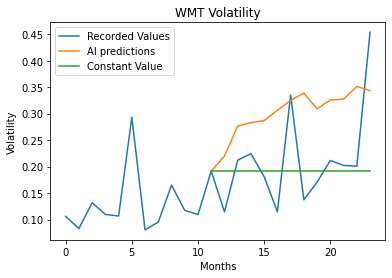

In [ ]:
graph_test("WMT")